# Notebook to generate and save white noise waveforms

In [1]:
import sys
sys.path.append('../../shared')
from inject_tools import *

from pathlib import Path
from os.path import isfile, join
from tqdm import tqdm

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


Load strain data (actually only need times)

In [2]:
gps = event_gps('GW150914') - 100
segment = ((gps) - 32, (gps) + 32)
hdata = TimeSeries.fetch_open_data('H1', *segment, sample_rate=4*4096, verbose=True, cache=True)

Fetched 1 URLs from www.gw-openscience.org for [1126259330 .. 1126259395))
Reading data... [Done]


/anaconda2/envs/gw_env/lib/python3.7/site-packages/gwpy/types/series.py:926: UserWarning: TimeSeries.crop given end larger than current end, crop will end when the Series actually ends.
  % type(self).__name__)


Define waveform parameters and generate the waveform

In [3]:
t_inj = gps
inj_type = 'wn' # white noise
times = hdata.times.value
f_low = 100
f_high = 200
tau = 0.1
Hp, Hc = white_noise(times, t_inj, f_low, f_high, tau)

Plot waveform

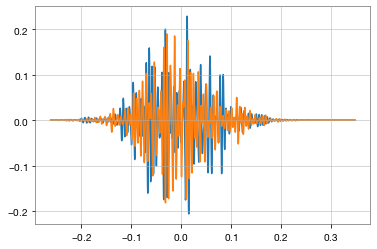

In [4]:
idx_s = 520000
idx_e = 530000
plt.plot(times[idx_s:idx_e] - t_inj, Hp[idx_s:idx_e])
plt.plot(times[idx_s:idx_e] - t_inj, Hc[idx_s:idx_e])
plt.show()

Save to file

In [5]:
params_path = Path('../../shared/injection_params')

with h5py.File(join(params_path, 
                    'wn_f_low_' + str(f_low) + '_f_high_' + str(f_high) + '_tau_' + str(tau) + '.hdf5'), 'w') as f:
    f.create_dataset('Hp', data=Hp)
    f.create_dataset('Hc', data=Hc)